In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import initializers, regularizers


10000


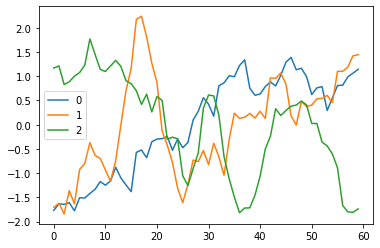

In [2]:
str0 = "ts_L60_Z12_A500_DX50_bias5_N10000"

fnamex = "DATA/x_"+str0+".csv"
fnamey = "DATA/y_"+str0+".csv"

x = np.asarray(pd.read_csv(fnamex, header = None))

N = len(x)
print(N)

scaler = StandardScaler()
x_std =  scaler.fit_transform(x.T).T

plt.plot(x_std[0], label = '0')
plt.plot(x_std[1], label = '1')
plt.plot(x_std[2], label = '2')
plt.legend()
plt.show() 

In [3]:
categ  = np.asarray(pd.read_csv(fnamey, header = None), dtype = int)
N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.
    
print(y[0])

[1. 0. 0.]


## Data splitting


In [4]:
perc_train = 0.8
N_train = int(N*perc_train)
N_val = N-N_train

x_train = x_std[:N_train]
y_train = y[:N_train]
x_val = x_std[N_train:]
y_val = y[N_train:]


L = len(x[0])
print(N, N_train, N_val, L)

10000 8000 2000 60


## Data reshaping

In [5]:
x_train = x_train.reshape(x_train.shape[0],L,1) #1 - channel (RGB:3)
                                                # L = sample size
x_val = x_val.reshape(x_val.shape[0],L,1)

input_shape = (L,1)

# CNN definition


In [ ]:
np.random.seed(12345)

reg = regularizers.l2(0.01) #Lasso

ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = Sequential()
#kernel_size = 11... similar to 12 as before
model.add(Conv1D( filters = 5, kernel_size = 11, kernel_regularizer = reg, 
                 kernel_initializer = ini, 
                 activation = "relu", 
                 input_shape = input_shape                
                ))
model.add(MaxPooling1D(5))
model.add(Conv1D(filters = 5, kernel_size = 7, 
                 activation = "relu", 
                ))
model.add(MaxPooling1D(2)) #optional
model.add(Flatten())
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(N_categ, activation = "softmax"))

model.summary()

model.compile(loss = keras.losses.categorical_crossentropy, 
              optimizer = "adam", 
             metrics = ["accuracy"])

# model.save_weights("Original_Weights_CNN1.h5")

Not Working!
The NN has as input larger and larger numbers. We shall manipulate the data at the beginning for example reshuffling them as they have average 0 and remove their standard deviation (set it to 1)


In [ ]:
hist = model.fit(x_train, y_train, batch_size = 250, epochs = 250, 
                 validation_data = (x_val, y_val), 
                verbose = 2, shuffle = True)

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(categ[N_train:],np.argmax(model.predict(x_val), axis=1),  normalize = 'true')


#Better visualization of confusion matrices
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize = (15, 8))
ax1.matshow(c_matrix, cmap = plt.cm.YlGn, alpha = 0.5)
ax1.set_xticks(np.arange(3))
ax1.set_yticks(np.arange(3))
for i in range(3):
    for j in range(3):
        ax1.text(x=j, y=i, s=round(c_matrix[i, j],2), ha="center", va="center")
ax1.xaxis.set_ticks_position('bottom')
ax1.set_xlabel('predicted label')
ax1.set_ylabel('true label')
ax1.set_title('CNN')
fig.tight_layout()
plt.show()

## Test Discrimination loss

In [ ]:
As = np.linspace(50,500,10)
res = []

for A in As[-3:]:
    str0 = f"ts_L60_Z12_A{A}_DX50_bias5_N10000"
    fnamex = "DATA/x_" + str0 + ".csv"
    fnamey = "DATA/y_" + str0 + ".csv"
    
    x = np.asarray(pd.read_csv(fnamex, header = None))

    scaler = StandardScaler()
    x_std =  scaler.fit_transform(x.T).T
    categ  = np.asarray(pd.read_csv(fnamey, header = None), dtype = int)
    N_categ = 3
    y = np.zeros((N,N_categ))

    for n in range(N):
        y[n][categ[n]] = 1.

    perc_train = 0.8
    N_train = int(N*perc_train)
    N_val = N-N_train

    x_train = x_std[:N_train]
    y_train = y[:N_train]
    x_val = x_std[N_train:]
    y_val = y[N_train:]


    L = len(x[0])
    x_train = x_train.reshape(x_train.shape[0],L,1) #1 - channel (RGB:3)
                                                   # L = sample size
    x_val = x_val.reshape(x_val.shape[0],L,1)

    input_shape = (L,1)
    
#     model.load_weights("Original_Weights_CNN1.h5")
    hist = model.fit(x_train, y_train, batch_size = 250, epochs = 50, 
                 validation_data = (x_val, y_val), 
                verbose = 2, shuffle = True)
    res.append(pd.DataFrame(hist))
    


In [ ]:
pd.DataFrame(hist)

# POINT 3 

# Data

In [6]:
x = np.loadtxt("DATA/x_ts_comp_N10000.csv", delimiter =",")
categ_y = np.loadtxt("DATA/y_ts_comp_N10000.csv", delimiter =",")

scaler = StandardScaler()
x =  scaler.fit_transform(x.T).T


OSError: x_ts_comp_N10000.csv not found.

In [10]:
y = to_categorical(categ_y)

In [11]:
L = len(x[0])
input_shape = (len(x[0]),1)
N_categ = 3



In [12]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2)
x_train = x_train.reshape(x_train.shape[0],L,1)
x_test = x_test.reshape(x_test.shape[0],L,1)

# Models

## 1

In [13]:

reg = regularizers.l1_l2(0.001)
np.random.seed(12345)

ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = Sequential()
model.add(Conv1D(filters=4, kernel_size = 11,
                kernel_regularizer = reg,
                kernel_initializer=ini,
                activation = "relu",
                input_shape = input_shape
                ))
model.add(AveragePooling1D(5))
model.add(Flatten())
model.add(Dense(10,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(N_categ, activation="sigmoid"))

print(model.summary())

opt = keras.optimizers.SGD(lr=0.1, momentum= 0.9, nesterov=True, decay = 1e-6)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer = "adam", metrics = ["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 50, 4)             48        
_________________________________________________________________
average_pooling1d_1 (Average (None, 10, 4)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 491
Trainable params: 491
Non-trainable params: 0
________________________________________________________

## 2

In [50]:
from keras import initializers, regularizers
reg = regularizers.l1_l2(0.001)
np.random.seed(12345)

ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = Sequential()
model.add(Conv1D(filters=3, kernel_size = 5,
                kernel_regularizer = reg,
                kernel_initializer=ini,
                activation = "relu",
                input_shape = input_shape
                ))
model.add(AveragePooling1D(5))
model.add(Flatten())
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))

model.add(Dropout(0.2))
model.add(Dense(N_categ, activation="sigmoid"))

print(model.summary())

opt = keras.optimizers.SGD(lr=0.1, momentum= 0.9, nesterov=True, decay = 1e-6)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer = "adam", metrics = ["accuracy"])

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           (None, 56, 3)             18        
_________________________________________________________________
average_pooling1d_28 (Averag (None, 11, 3)             0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 33)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 10)                340       
_________________________________________________________________
dense_58 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_59 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_29 (Dropout)         (None, 10)              

## 3

In [46]:
from keras import initializers, regularizers
reg = regularizers.l1_l2(0.001)
np.random.seed(12345)

ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = Sequential()
model.add(Conv1D(filters=13, kernel_size = 23,
                kernel_regularizer = reg,
                kernel_initializer=ini,
                activation = "relu",
                input_shape = input_shape
                ))
model.add(AveragePooling1D(5))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(N_categ, activation="sigmoid"))

print(model.summary())

opt = keras.optimizers.SGD(lr=0.1, momentum= 0.9, nesterov=True, decay = 1e-6)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer = "adam", metrics = ["accuracy"])

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_29 (Conv1D)           (None, 38, 13)            312       
_________________________________________________________________
average_pooling1d_25 (Averag (None, 7, 13)             0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 91)                0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 91)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 3)                 276       
Total params: 588
Trainable params: 588
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True)

Epoch 1/250
32/32 [==============================] - 1s 10ms/step - loss: 1.1022 - accuracy: 0.3405 - val_loss: 1.0980 - val_accuracy: 0.3465
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 1.0965 - accuracy: 0.3554 - val_loss: 1.0940 - val_accuracy: 0.3585
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 1.0919 - accuracy: 0.3745 - val_loss: 1.0901 - val_accuracy: 0.3605
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 1.0857 - accuracy: 0.3887 - val_loss: 1.0840 - val_accuracy: 0.3790
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 1.0786 - accuracy: 0.3985 - val_loss: 1.0750 - val_accuracy: 0.4025
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 1.0730 - accuracy: 0.4056 - val_loss: 1.0618 - val_accuracy: 0.4145
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 1.0567 - accuracy: 0.4200 - val_loss: 1.0479 - val_accuracy: 0.4195
Epoch 8/250


Epoch 59/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7203 - accuracy: 0.6720 - val_loss: 0.6888 - val_accuracy: 0.6870
Epoch 60/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7077 - accuracy: 0.6810 - val_loss: 0.6886 - val_accuracy: 0.6925
Epoch 61/250
32/32 [==============================] - 0s 5ms/step - loss: 0.7139 - accuracy: 0.6693 - val_loss: 0.6881 - val_accuracy: 0.6865
Epoch 62/250
32/32 [==============================] - 0s 5ms/step - loss: 0.7102 - accuracy: 0.6623 - val_loss: 0.6873 - val_accuracy: 0.6875
Epoch 63/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7044 - accuracy: 0.6755 - val_loss: 0.6851 - val_accuracy: 0.6915
Epoch 64/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7124 - accuracy: 0.6812 - val_loss: 0.6839 - val_accuracy: 0.6880
Epoch 65/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7129 - accuracy: 0.6733 - val_loss: 0.6838 - val_accuracy: 0.6885
Epoch 

32/32 [==============================] - 0s 4ms/step - loss: 0.6590 - accuracy: 0.7005 - val_loss: 0.6417 - val_accuracy: 0.7065
Epoch 174/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6630 - accuracy: 0.7090 - val_loss: 0.6407 - val_accuracy: 0.7130
Epoch 175/250
32/32 [==============================] - 0s 5ms/step - loss: 0.6577 - accuracy: 0.7094 - val_loss: 0.6409 - val_accuracy: 0.7130
Epoch 176/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6560 - accuracy: 0.7030 - val_loss: 0.6416 - val_accuracy: 0.7110
Epoch 177/250
32/32 [==============================] - 0s 5ms/step - loss: 0.6618 - accuracy: 0.7043 - val_loss: 0.6438 - val_accuracy: 0.7150
Epoch 178/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6582 - accuracy: 0.7042 - val_loss: 0.6467 - val_accuracy: 0.7120
Epoch 179/250
32/32 [==============================] - 0s 5ms/step - loss: 0.6599 - accuracy: 0.7030 - val_loss: 0.6406 - val_accuracy: 0.7100
Epoch 180/250